### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
warnings.filterwarnings("ignore")

### Importing csv file as dataframe

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads/laptop.csv")

### Sneak peek of data

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.shape

(1303, 13)

### Dealing with null or missing values if any

In [7]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
df["Inches"] = df["Inches"].str.replace("?",f'{df["Inches"].mode()[0]}')

In [11]:
df["Weight"] = df["Weight"].str.replace("?",f'{df["Weight"].mode()[0]}')

### Dealing with unwanted columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1273 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 139.2+ KB


In [13]:
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


### Dealing with duplicate columns if any

In [15]:
df.shape

(1273, 11)

In [16]:
df.duplicated().sum()

29

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(1244, 11)

### EDA

<Axes: xlabel='Price', ylabel='Density'>

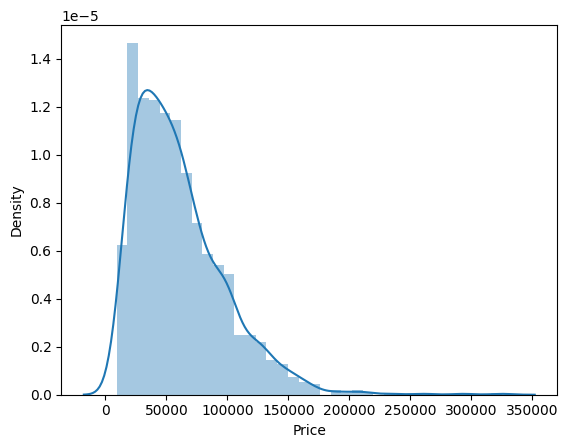

In [19]:
sns.distplot(df["Price"])

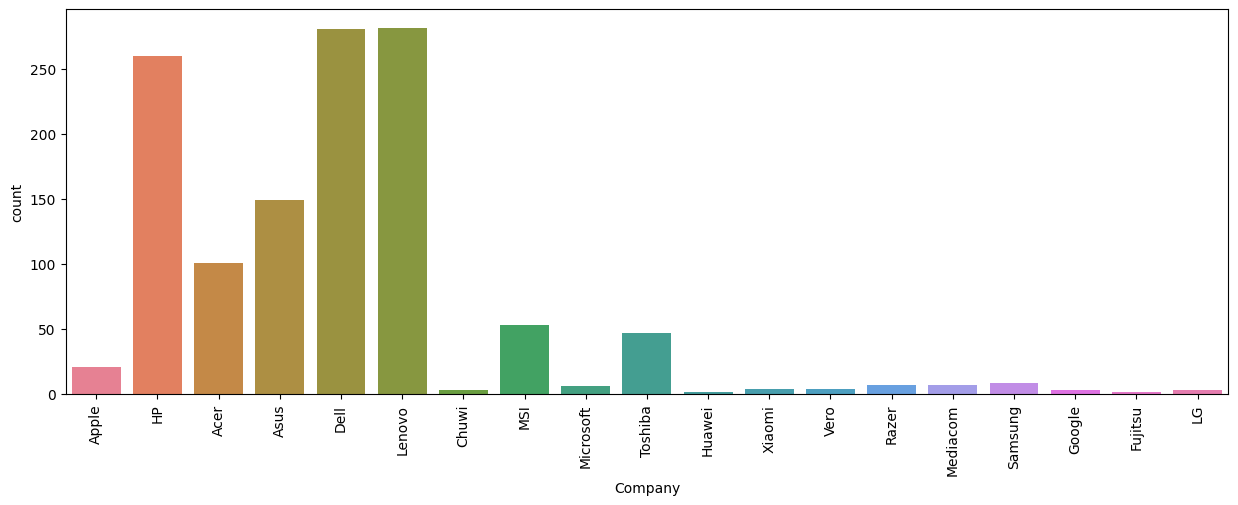

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Company"],hue=df["Company"])
plt.xticks(rotation="vertical")
plt.show()

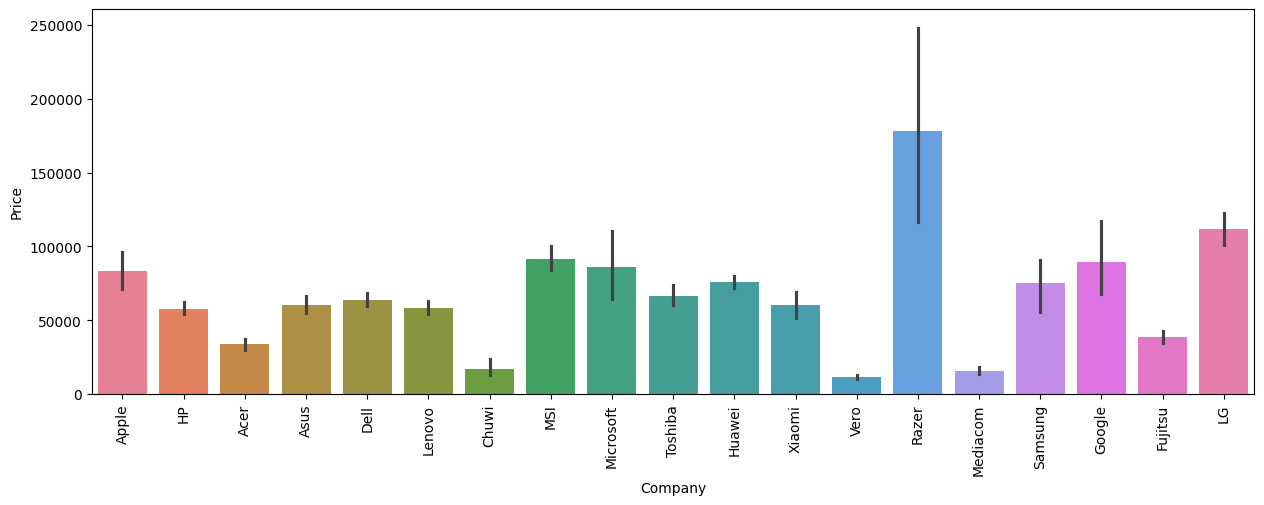

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["Company"],y=df["Price"],hue=df["Company"])
plt.xticks(rotation="vertical")
plt.show()

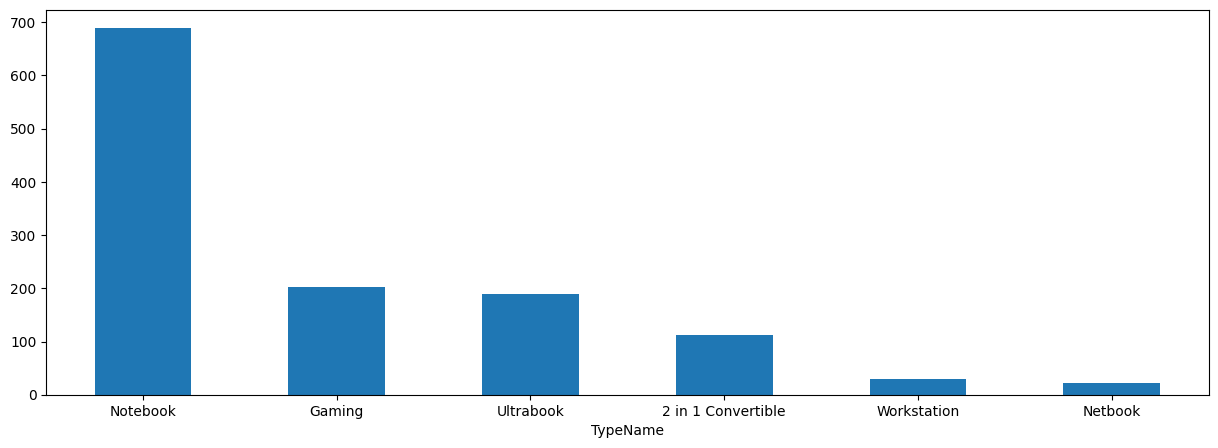

In [22]:
plt.figure(figsize=(15,5))
df["TypeName"].value_counts().plot(kind="bar")
plt.xticks(rotation="horizontal")
plt.show()

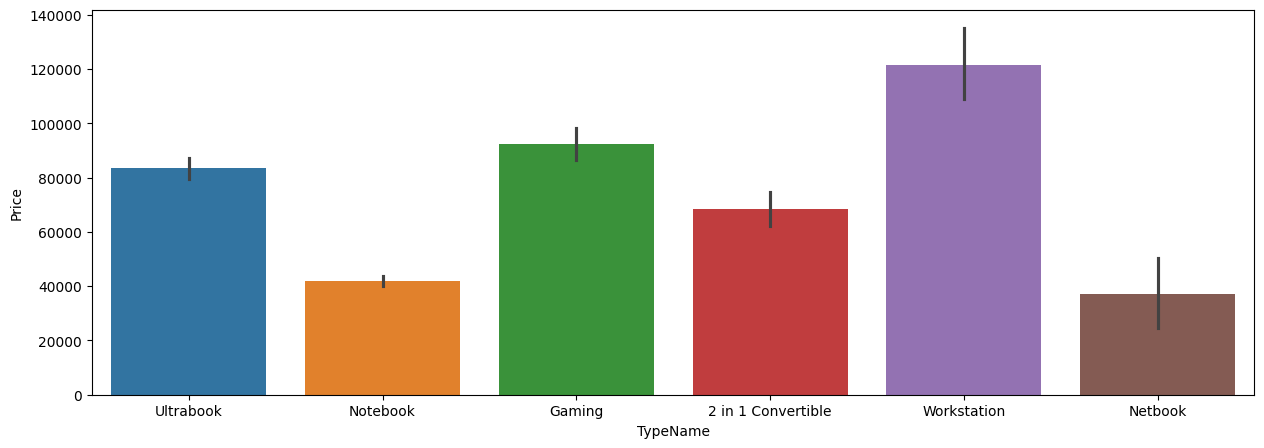

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["TypeName"],y=df["Price"],hue=df["TypeName"])
plt.xticks(rotation="horizontal")
plt.show()

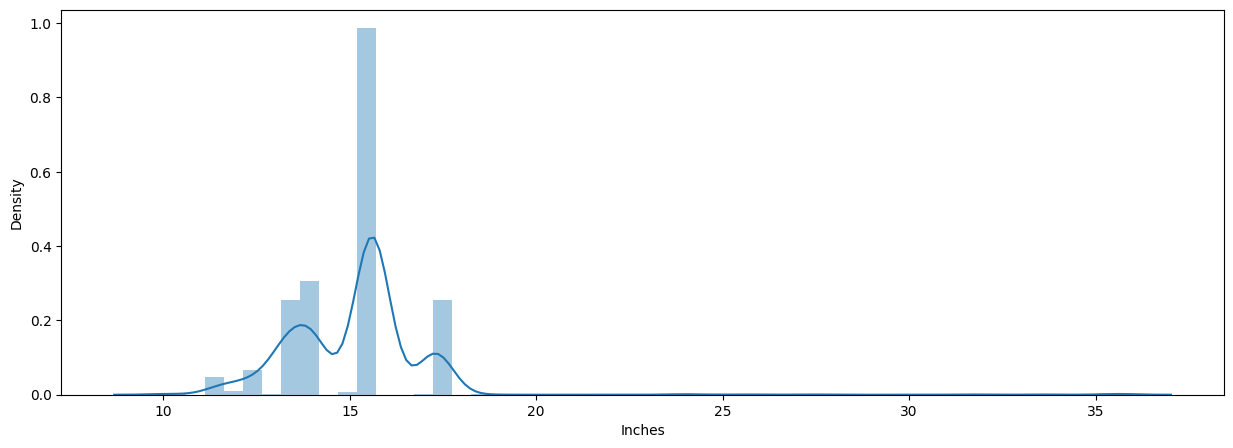

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df["Inches"])
plt.show()

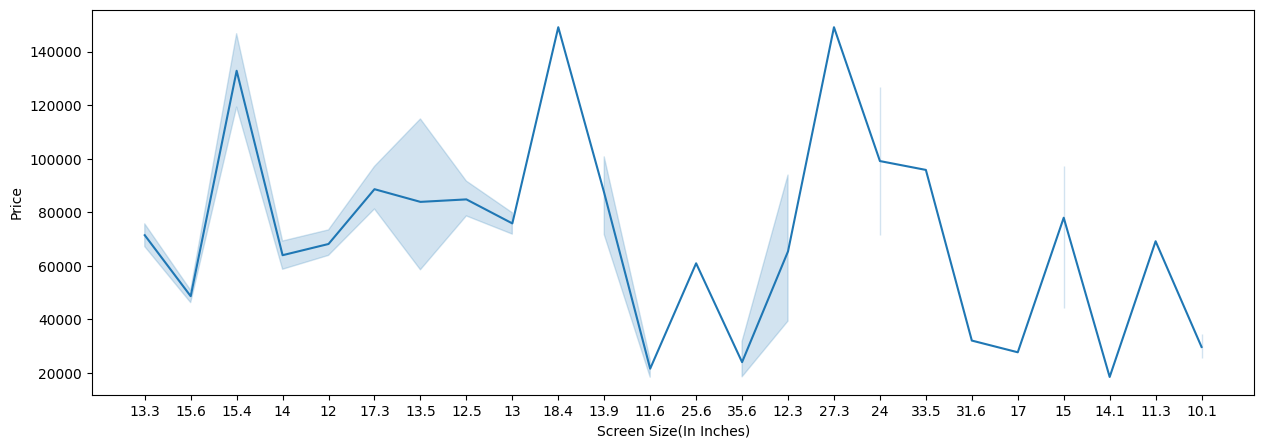

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df["Inches"],y=df["Price"])
plt.xlabel("Screen Size(In Inches)")
plt.show()

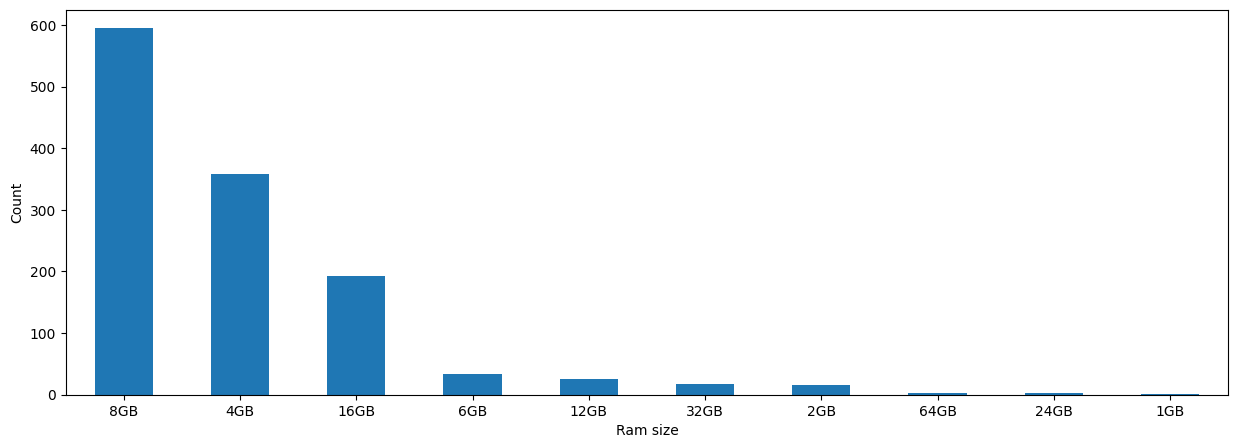

In [26]:
plt.figure(figsize=(15,5))
df["Ram"].value_counts().plot(kind="bar")
plt.xlabel("Ram size")
plt.ylabel("Count")
plt.xticks(rotation="horizontal")
plt.show()

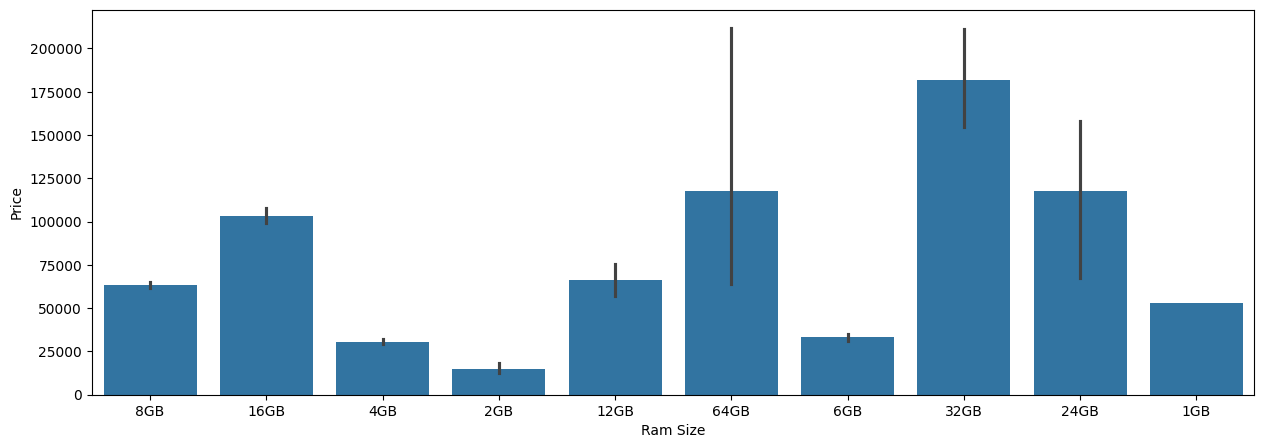

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["Ram"],y=df["Price"])
plt.xlabel("Ram Size")
plt.show()

### Feature Engineering

In [28]:
df["Ram"] =  df["Ram"].str.replace("GB"," ")

In [29]:
df["Weight"] = df["Weight"].str.replace("kg"," ")

In [30]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [31]:
df["Ram"]  = df["Ram"].astype("int32")

In [32]:
df[df["Weight"] == "?"]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [33]:
df["Weight"] = df["Weight"].astype("float32")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 106.9+ KB


In [35]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [36]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.50,46833.120,0
477,Lenovo,Notebook,14,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70,72673.920,0
316,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.29,130482.720,1
887,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,72988.272,0
811,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128671.200,0


In [37]:
df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [38]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
91,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,2,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,36709.92,0,0
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.44,0,0
964,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.50GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,45101.52,0,0
344,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,84129.12,0,0
1117,Razer,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12,1,0


In [39]:
new = df["ScreenResolution"].str.split("x",n=1,expand=True)

In [40]:
df["x_res"] = new[0]
df["y_res"] = new[1]

In [41]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [42]:
df["x_res"] = df["x_res"].str.findall(r'\d+\.?\d+').apply(lambda x: x[0])

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
 11  Touchscreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  x_res             1244 non-null   object 
 14  y_res             1244 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(2), object(10)
memory usage: 145.8+ KB


In [45]:
df["x_res"] = df["x_res"].astype("int32")
df["y_res"] = df["y_res"].astype("int32")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
 11  Touchscreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  x_res             1244 non-null   int32  
 14  y_res             1244 non-null   int32  
dtypes: float32(1), float64(1), int32(3), int64(2), object(8)
memory usage: 136.1+ KB


In [47]:
df["Inches"] = df["Inches"].astype("float")

In [48]:
df["ppi"] = (((df["x_res"]**2) + (df["y_res"]**2))**0.5/df["Inches"]).astype("float")

In [49]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [50]:
df.drop(columns=["Inches","ScreenResolution","x_res","y_res"],inplace=True)

In [51]:
df["cpuName"] = df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [53]:
def fetch_processor(text):
    if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [54]:
df["Processor"] = df["cpuName"].apply(fetch_processor)

In [55]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpuName,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [56]:
df.drop(columns=["cpuName","Cpu"],axis=1,inplace=True)

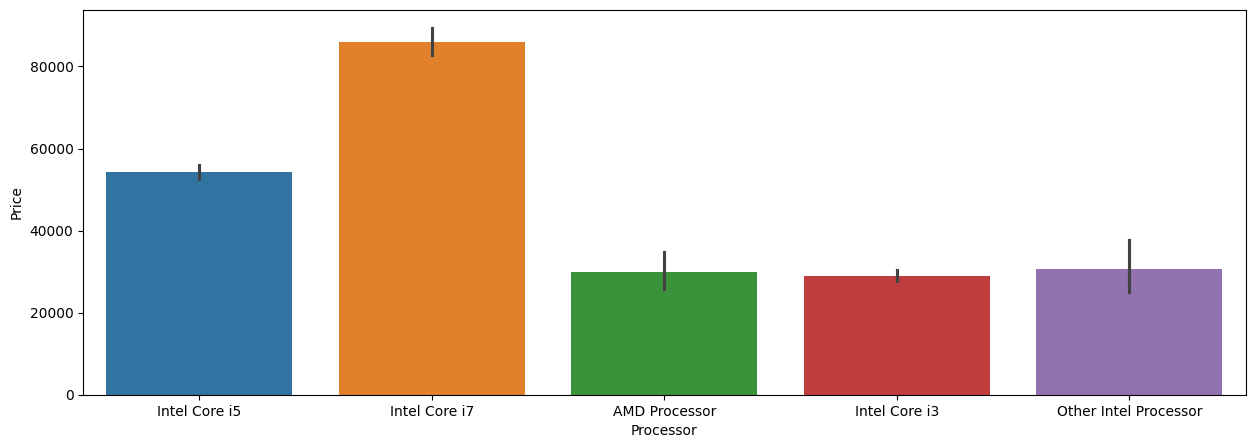

In [57]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["Processor"],y=df["Price"],hue=df["Processor"])
plt.xticks(rotation="horizontal")
plt.show()

In [58]:
unique_device_Storage = ["SSD","HDD","Flash Storage","Hybrid"]

In [59]:
def SSD_check(text):
    if i in text:
        # print(text.findall(r'/d+'))
        return 1
    else:
        return 0


In [60]:
for i in unique_device_Storage:
    df[i] = df["Memory"].apply(SSD_check)

In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,1,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,1,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,1,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,1,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,1,0,0,0


In [62]:
df.drop(columns=["Memory"],inplace=True)

In [63]:
df.corr(numeric_only=True)["Price"]


Ram              0.681922
Weight           0.176399
Price            1.000000
Touchscreen      0.186393
IPS              0.252956
ppi              0.464694
SSD              0.505481
HDD             -0.166519
Flash Storage   -0.201598
Hybrid           0.020801
Name: Price, dtype: float64

In [64]:
df.drop(columns=["Hybrid","Flash Storage"],inplace=True)

In [65]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,1,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,1,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,1,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,1,0


In [66]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      269
Intel HD Graphics 520      177
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [67]:
df["Gpu Brand"] = df["Gpu"].apply(lambda x: x.split()[0])

In [68]:
df["Gpu Brand"].value_counts()

Gpu Brand
Intel     684
Nvidia    389
AMD       170
ARM         1
Name: count, dtype: int64

In [69]:
df = df[df["Gpu Brand"] != "ARM"]

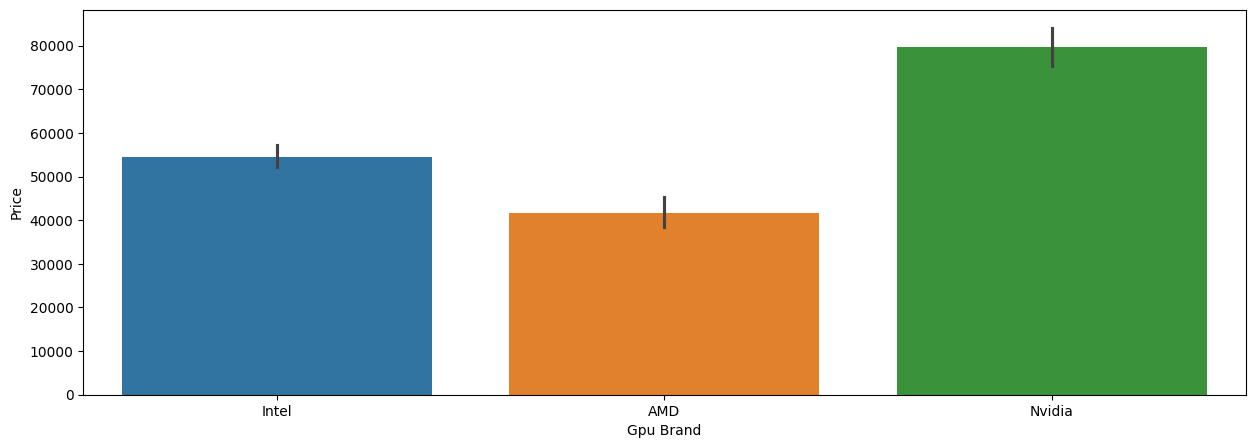

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["Gpu Brand"],y=df["Price"],hue=df["Gpu Brand"])
plt.xticks(rotation="horizontal")
plt.show()

In [71]:
df.drop(columns=["Gpu"],inplace=True)

In [72]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,SSD,HDD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,1,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,1,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,1,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,1,0,Intel


In [73]:
df["OpSys"].value_counts()

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [74]:
def os_category(input):
    if input == "Windows 10" or input == "Windows 7" or input == "Windows 10 S":
        return "Windows"
    elif input == "Mac OS X" or input == "macOS":
        return "Mac"
    else:
        return "Others/Linux/No OS"

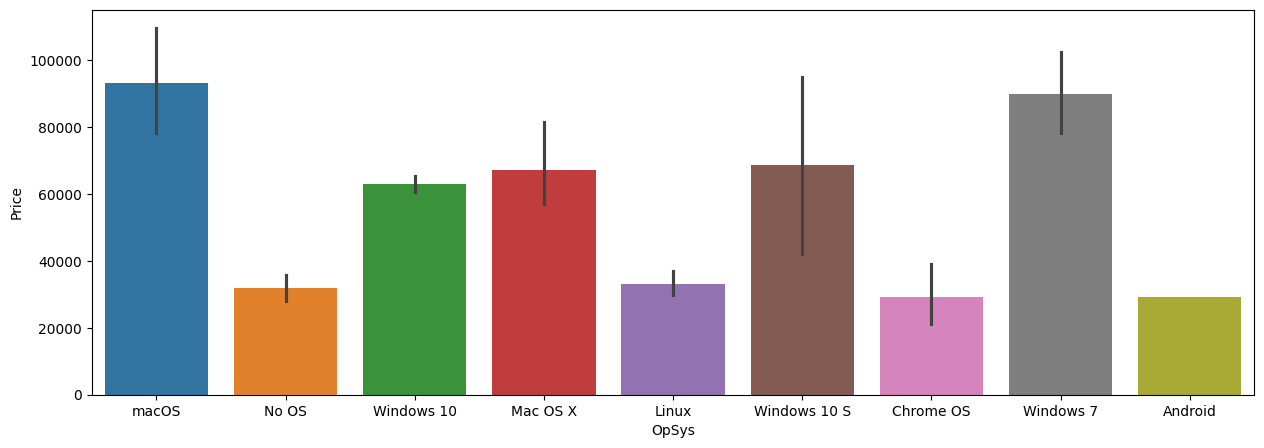

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["OpSys"],y=df["Price"],hue=df["OpSys"])
plt.show()

In [76]:
df["OS"] = df["OpSys"].apply(os_category)

In [77]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Processor,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,1,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,1,0,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,1,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,1,0,Intel,Mac


In [78]:
df.drop(columns=["OpSys"],inplace=True)

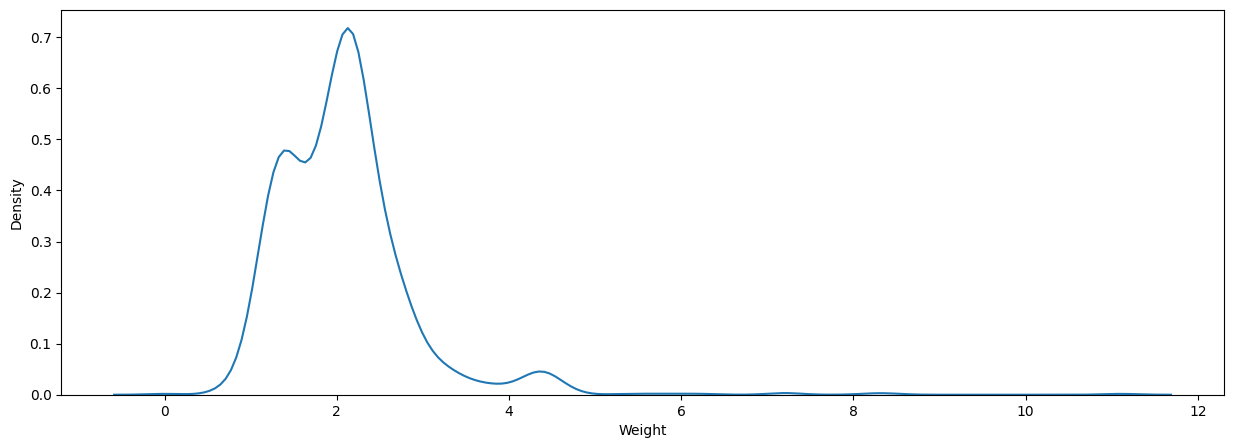

In [79]:
plt.figure(figsize=(15,5))
sns.kdeplot(df["Weight"])
plt.show()

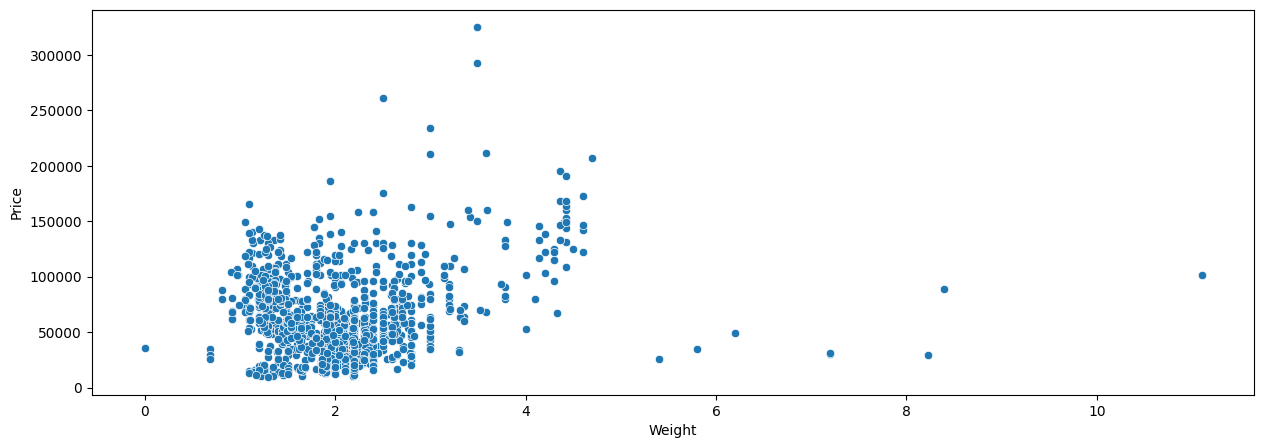

In [80]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df["Weight"],y=df["Price"])
plt.show()

<Axes: >

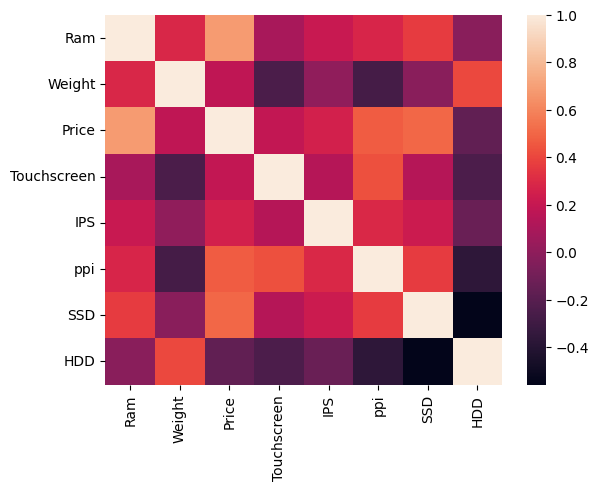

In [81]:
sns.heatmap(df.corr(numeric_only=True))

In [82]:
X =df.drop(columns=["Price"])
y = np.log(df["Price"])

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [84]:
# Categorical_cols = df.select_dtypes(include="object").columns.tolist()

In [85]:
# encoder = OneHotEncoder(sparse_output=False,drop='first')

In [86]:
# one_hot_encoded = encoder.fit_transform(df[Categorical_cols])

In [87]:
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(Categorical_cols))

In [88]:
# df_encoded = pd.concat([df, one_hot_df], axis=1)

In [89]:
# df_encoded = df_encoded.drop(Categorical_cols, axis=1)

In [90]:
# df_encoded.dropna(inplace=True)

In [91]:
# linear_reg = LinearRegression()

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

### Linear regression

In [93]:

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7615393939557288
MAE 0.21092524050541983


### Random Forest

In [94]:
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8547346023905384
MAE 0.17474730946258546


### Gradient Boosting

In [95]:
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8755679030970689
MAE 0.1559297952215235


In [96]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [97]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Processor,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,1,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,1,0,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,1,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,1,0,Intel,Mac
